<a href="https://colab.research.google.com/github/jhaarun/jhaarun.github.io/blob/master/Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Necessary Libraries

In [33]:
import cv2
import numpy as np
import glob
import random
import os
from google.colab.patches import cv2_imshow
from scipy.spatial import distance as dist

Testing the Data

Loading YOLO from disk...
0
0
[[1]
 [0]]


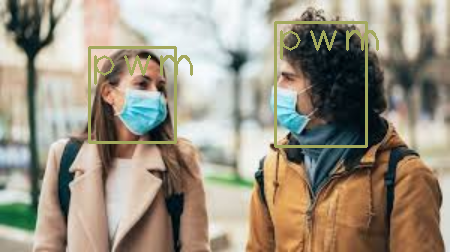

0
0
[[0]
 [1]]


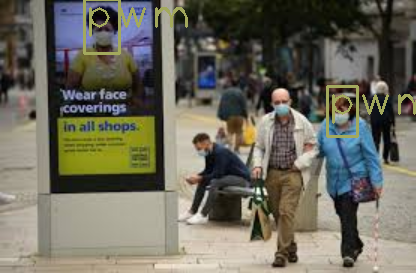

0
0
0
[[1]
 [2]]


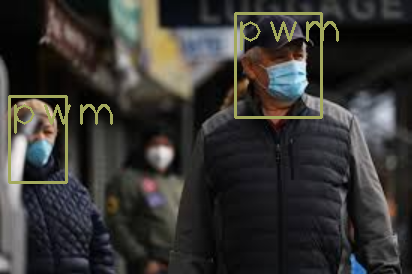

0
[[0]]


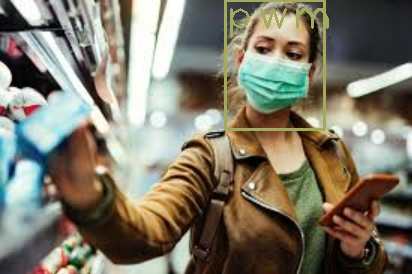

()


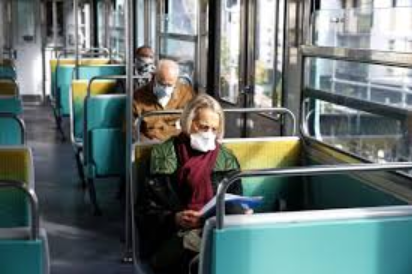

0
[[0]]


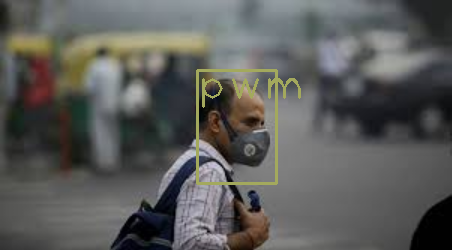

In [34]:
# Load Yolo
weightsPath = os.path.sep.join(["/content/drive/MyDrive/yolov3/yolov3_training_last.weights"])
configPath = os.path.sep.join(["/content/drive/MyDrive/yolov3/yolov3_testing.cfg"])

# read a network model stored in Darknet model
print("Loading YOLO from disk...")
net = cv2.dnn.readNetFromDarknet(configPath, weightsPath)

# Name custom object pwm (person with mask)
classes = ["pwm"]

# Images path
images_path = glob.glob(r"/content/drive/MyDrive/yolov3/Image data/Testing data/*.jpg")


layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

# Insert here the path of your images
random.shuffle(images_path)
# loop through all the images
for img_path in images_path:
    # Loading image
    img = cv2.imread(img_path)
    img = cv2.resize(img, None, fx=1.5, fy=1.5)
    height, width, channels = img.shape

    # Detecting objects
    blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

    net.setInput(blob)
    outs = net.forward(output_layers)

    # Showing informations on the screen
    class_ids = []
    confidences = []
    boxes = []
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.01:
                # Object detected
                print(class_id)
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                # Rectangle coordinates
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
    print(indexes)
    font = cv2.FONT_HERSHEY_PLAIN
    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            color = colors[class_ids[i]]
            cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
            cv2.putText(img, label, (x, y + 30), font, 3, color, 2)


    cv2_imshow(img)
    key = cv2.waitKey(0)

cv2.destroyAllWindows()
